In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [33]:
dftrain = pd.read_csv('./data/train_set.csv', sep=';').dropna()
dftest = pd.read_csv('./data/test_set.csv', sep=';').dropna()
dftrain_0 = dftrain.loc[dftrain['target'] == 0]
dftrain_1 = dftrain.loc[dftrain['target'] == 1]

print(dftrain.head(n=5))
print("dimension of train dataset is : " + str(np.shape(dftrain)))
print("dimension of test dataset is : " + str(np.shape(dftest)))

Xtrain, ytrain = dftrain.iloc[:,:-1], dftrain.iloc[:, -1]
Xtest = dftest


       col1  col2  col3      col4     col5  col6  col7  col8  col9  col10  \
0  0.957151    40     0  0.121876   2600.0     4     0     0     0    1.0   
1  0.658180    38     1  0.085113   3042.0     2     1     0     0    0.0   
2  0.233810    30     0  0.036050   3300.0     5     0     0     0    0.0   
3  0.907239    49     1  0.024926  63588.0     7     0     1     0    0.0   
4  0.213179    74     0  0.375607   3500.0     3     0     1     0    1.0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
dimension of train dataset is : (108199, 11)
dimension of test dataset is : (12070, 10)


### 1. Observation on the dataset

Our dataset is composed of 10 columns with binary or numerical values. The 11th column is our target, which is binary. Our goal is to classify the test dataset in c = 2 classes (0 or 1) given the totality of our dataset. <br>
The data set presents also many NaN values either in the train or the test dataset.
It is interesting to point out that a dimension D = 10 is relatively big, and can lead to inaccuracy while classifying  the data if the dataset is too small. In our case, we will consider that the size of both row data set (13500 and 15000) are big enought to drop the rows with any NaN values and still keep a great size (108199 and 12070) to give models with a trustable accuracy.

#### a. Covariance and Linear Dependance
Some models work better regarding the linear independance of the feature conditionally to each class. We will study the covariance of our train dataset (for both class).

In [34]:
cov0 = dftrain_0.drop('target', 1).cov()
cov1 = dftrain_1.drop('target', 1).cov()
#cov1

Both covariance matrix are quite similars(strong values on the diagonal and for the covariance with feature 5). But there are not diagonal, hence the features are not lineraly independants conditionally to each class : a Naive Bayes classifier (which assume this condition) should not be used.

#### b. Principal Component Analysis
In order to have an idea about the dataset, a common method is to plot the dot. Unfortunately, our given data set is in D = 10 dimension which makes it impossible to plot for the human eye to make sense of it. We will apply a PCA analysis in order to reduce the dimension to d_pca = 3. <br>

Warning : The PCA is NOT a method to discriminate data but a method to reduce the dimension. We will use it, here, only for representation and keep the result with perspective as the PCA doesn't focus on the most discriminative axes when it executes the reduction (the returned axes may not be the axes that mostly points out the separation of the two classes).

In [35]:
from sklearn.decomposition import PCA
# normalize dataset
Xtrain_norm = (Xtrain - Xtrain.mean())/Xtrain.std()
# apply PCA
pca = PCA(n_components=3, whiten= True)
Xtrain_pca = pca.fit_transform(Xtrain_norm)

In [36]:
def plot_points(X,y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    X1 = []
    X2 = []
    for i in range(len(y)):
        if (y.iloc[i] == 0):
            X1.append(X[i])
        else:
            X2.append(X[i])
    X1 = np.array(X1)
    X2 = np.array(X2)
    ax.scatter(X1[:,0], X1[:,1], X1[:,2], c='blue', marker='^')
    ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='red', marker='o')

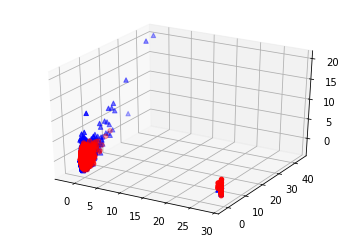

In [37]:
plot_points(Xtrain_pca, ytrain)
plt.show()

If we consider the PCA as trustable, we can say that data are clearly not linearly separable. Indeed, there is not a linear and neiter a clear distinction in between the the two clusters. By taking this information into account, we can believe that models that work nicely on distinct clusters (i.e Perceptron classifier) should not be used.

### 2. Applying models

Regarding the few interpretations in the previous sections, we will use a decision tree as a classifier for our dataset and try to predict the target value.

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
#cross_val_score(clf, iris.data, iris.target, cv=10)
clf.fit(Xtrain,ytrain)
y_pred = clf.predict(Xtest)
print(y_pred)


[0 0 0 ..., 1 0 1]


In [39]:
#Using the prediction fit to predict the train set:
clf.fit(Xtest,y_pred)
test_pred = clf.predict(Xtrain)

In [40]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test_pred, ytrain)
roc_curve(test_pred, ytrain)
fpr
tpr


array([ 0.        ,  0.24366554,  1.        ])

In [41]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5955481672741294

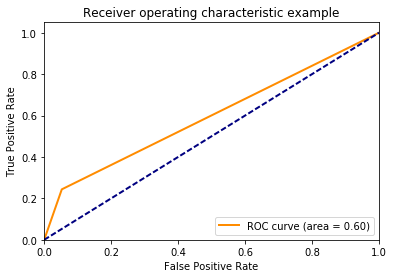

In [42]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

@github : https://github.com/AlexisDrch/DataMining-project <br>
@ Alexis Durocher & Luan Vieira